In [2]:
#Performig task-3 iris data classification

In [3]:
#importing the all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.svm import SVC

In [4]:
#importing the dataset
data = pd.read_csv("C:\\Users\\G.Madhu mitha\\Downloads\\Iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [7]:
data.shape

(150, 5)

In [9]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Species'],
      dtype='object')

In [10]:
data.nunique()

sepal length    35
sepal width     23
petal length    43
petal width     22
Species          3
dtype: int64

In [13]:
data.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
Species         False
dtype: bool

In [12]:
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Species         0
dtype: int64

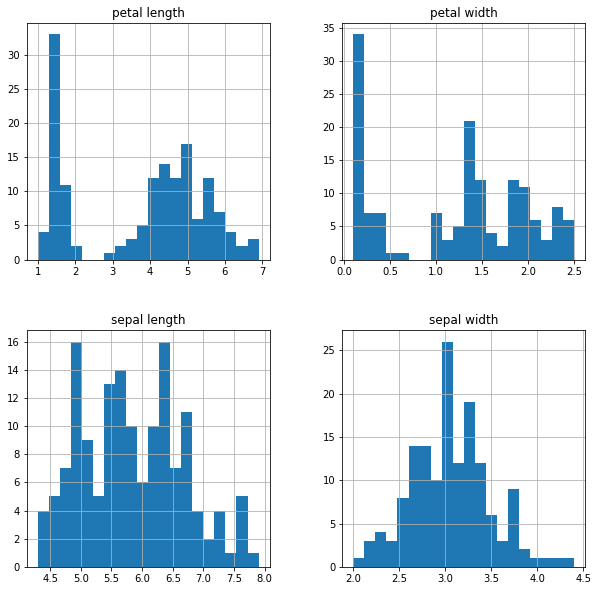

In [14]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

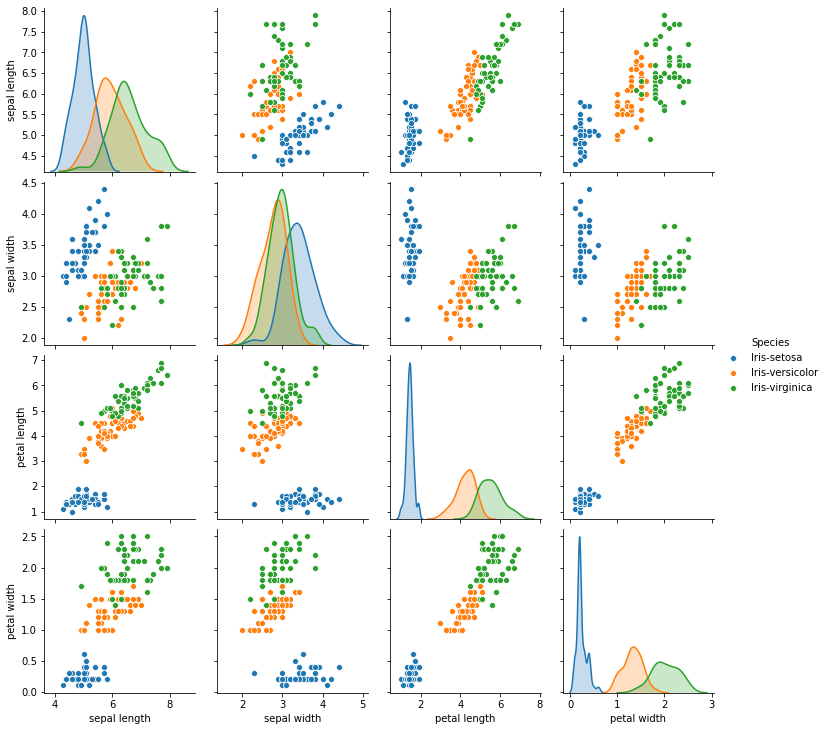

In [15]:
sn.pairplot(data, hue='Species')

# Outlier detection and Removal

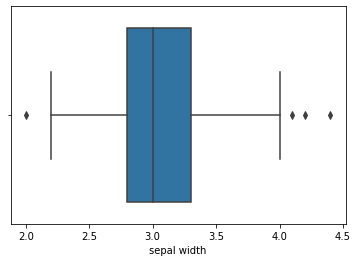

In [18]:
sn.boxplot(data['sepal width'])

In [19]:
q1 = data['sepal width'].quantile(.25)
q3 = data['sepal width'].quantile(.75)
print(q1)
print(q3)
IQR = q3-q1
print(IQR)
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

2.8
3.3
0.5


In [25]:
data = data[data['sepal width']<upper_limit]
data = data[data['sepal width']>lower_limit]

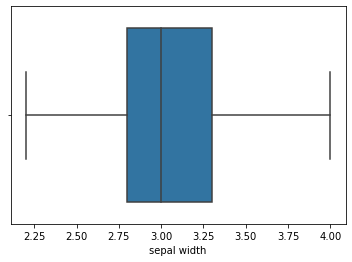

In [26]:
sn.boxplot(data['sepal width'])

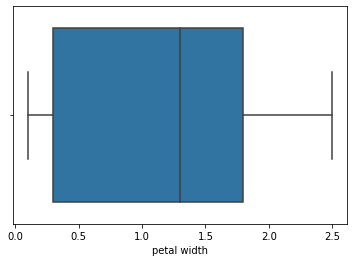

In [29]:
sn.boxplot(data['petal width'])

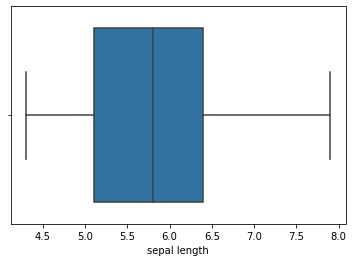

In [30]:
sn.boxplot(data['sepal length'])

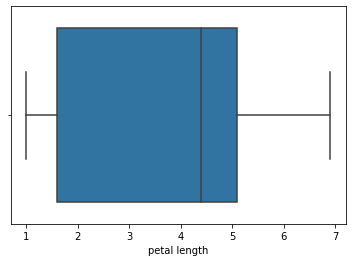

In [31]:
sn.boxplot(data['petal length'])

In [32]:
#Separating feature and target values
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [33]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [35]:
#Splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train.head()

,sepal length,sepal width,petal length,petal width
4,5.0,3.6,1.4,0.2
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
17,5.1,3.5,1.4,0.3


In [37]:
X_test.head()

,sepal length,sepal width,petal length,petal width
48,5.3,3.7,1.5,0.2
101,5.8,2.7,5.1,1.9
28,5.2,3.4,1.4,0.2
20,5.4,3.4,1.7,0.2
45,4.8,3.0,1.4,0.3


In [38]:
y_train.head()

4         Iris-setosa
27        Iris-setosa
127    Iris-virginica
132    Iris-virginica
17        Iris-setosa
Name: Species, dtype: object

In [39]:
y_test.head()

48        Iris-setosa
101    Iris-virginica
28        Iris-setosa
20        Iris-setosa
45        Iris-setosa
Name: Species, dtype: object

In [46]:
print(X_train.shape,y_train.shape)


(116, 4) (116,)


In [47]:
print(X_test.shape,y_test.shape)

(30, 4) (30,)


In [48]:
#Training the model
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [49]:
#Fitting the model to training data
model.fit(X_train,y_train)

SVC(kernel='linear')

In [50]:
#Predicting on the test data using the model
y_pred = model.predict(X_test)

In [51]:
#Performance metrics
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))
print(" ")
print("Accuracy score: ", accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

 
Accuracy score:  0.9666666666666667
